# Type Detection on Amazon: Movie or TV Series?
This project aims to develop a machine learning model capable of automatically classifying products listed on Amazon as either movies or TV seasons. Leveraging a dataset of Amazon product titles and descriptions, we will employ natural language processing techniques and machine learning algorithms to predict the type of content each product represents. By automating this classification task, we aim to enhance the efficiency of content categorization, helping users easily find and purchase their desired movies and TV series on the platform.

## Import Libraries

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

## Uploading CSV
uploading csv, storing in dataframe and displaying first 5 entries of dataframe

In [131]:
df = pd.read_csv('amazon_prime_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


## .shape
returns a tuple representing the dimensions (number of rows and columns) of a pandas DataFrame.

In [132]:
df.shape

(9668, 12)

## renaming and dropping
renaming column listen_in to genre and dropping column show_id.

In [133]:
df.rename(columns={'listed_in':'genre'},inplace=True)
df.drop(['show_id'], axis = 1, inplace = True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


## .info
provides a concise summary of information about a pandas DataFrame, including data types, non-null counts, and memory usage.

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9668 non-null   object
 1   title         9668 non-null   object
 2   director      7586 non-null   object
 3   cast          8435 non-null   object
 4   country       672 non-null    object
 5   date_added    155 non-null    object
 6   release_year  9668 non-null   int64 
 7   rating        9331 non-null   object
 8   duration      9668 non-null   object
 9   genre         9668 non-null   object
 10  description   9668 non-null   object
dtypes: int64(1), object(10)
memory usage: 831.0+ KB


## features types
assinging and displaying features types.

In [135]:
feature_types = {
    'type': 'Nominal Categorical',
    'title': 'Nominal Categorical',
    'director': 'Nominal Categorical',
    'cast': 'Nominal Categorical',
    'country': 'Nominal Categorical',
    'date_added': 'Nominal Categorical',
    'release_year': 'Numerical',
    'rating': 'Nominal Categorical',
    'duration': 'Nominal Categorical',
    'genre': 'Nominal Categorical',
    'description': 'Nominal Categorical'
}

for column in df.columns:
    if column in feature_types:
        print(f"{column}: {feature_types[column]}")
    else:
        print(f"{column}: Not specified")

type: Nominal Categorical
title: Nominal Categorical
director: Nominal Categorical
cast: Nominal Categorical
country: Nominal Categorical
date_added: Nominal Categorical
release_year: Numerical
rating: Nominal Categorical
duration: Nominal Categorical
genre: Nominal Categorical
description: Nominal Categorical


## missing data analysis
calculates and returns the count of missing (null) values for each column in a DataFrame, allowing for easy identification of data gaps.

In [136]:
df.isnull().sum()

type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
genre              0
description        0
dtype: int64

## dupliacted data analysis
calculates and returns the count of missing (null) values for each column in a DataFrame , helping to assess the impact of data removal on missing data patterns.

In [137]:
df.duplicated().sum()

0

## missing data percentage calculation
calculates and stores the percentage of missing (null) values for each column in a DataFrame (df). It divides the count of missing values by the total number of rows in the DataFrame and then rounds the result to two decimal places, providing insights into the proportion of missing data for each column.

In [138]:
percentage = (df.isnull().sum() / df.shape[0] * 100).round(2)
percentage

type             0.00
title            0.00
director        21.53
cast            12.75
country         93.05
date_added      98.40
release_year     0.00
rating           3.49
duration         0.00
genre            0.00
description      0.00
dtype: float64

## high-missing-value columns removal
columns_to_drop is a list of column names where the percentage of missing values exceeds 90%. These columns are then removed from the DataFrame df to create a new DataFrame

In [139]:
columns_to_drop = percentage[percentage > 90].index.tolist()
df_dropped = df.drop(columns=columns_to_drop)

## initial data preview
 displays the top rows of the DataFrame, allowing a quick overview of its structure and content following the removal of high-missing-value columns.

In [140]:
df_dropped.head()

,type,title,director,cast,release_year,rating,duration,genre,description
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


## missing value imputation
creates a new DataFrame by filling all missing values in the previous DataFrame with the string "unattainable," addressing missing data by replacing it with a specified placeholder value.

In [141]:
df_dropped_filled = df_dropped.fillna("unattainable")

In [142]:
df_visualization = df_dropped_filled.copy()

## Visualizations
### Genre Distribution of Movies

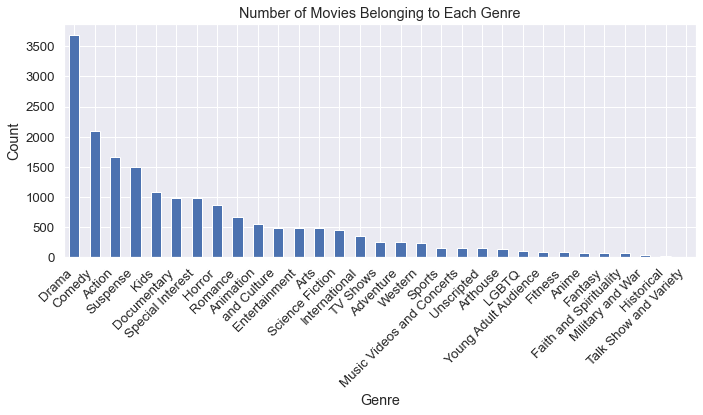

In [143]:
all_genres = df_visualization['genre'].str.split(',').explode().str.strip()
genre_counts = all_genres.value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of Movies Belonging to Each Genre')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

### Top 4 Genre Distribution

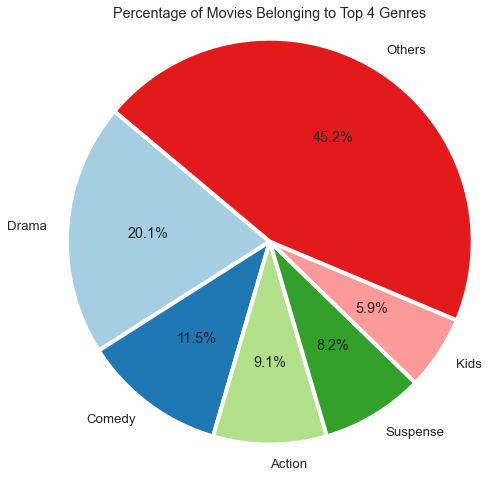

In [144]:
top_4_genres = genre_counts.nlargest(5)
other_genres_count = genre_counts[~genre_counts.index.isin(top_4_genres.index)].sum()
combined_genre_counts = pd.concat([top_4_genres, pd.Series({'Others': other_genres_count})])
plt.figure(figsize=(8, 8))
plt.pie(combined_genre_counts, labels=combined_genre_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'linewidth': 4.0, 'edgecolor': 'white'})
plt.title('Percentage of Movies Belonging to Top 4 Genres')
plt.axis('equal')
plt.show()

### Percentage Distribution of Content Type

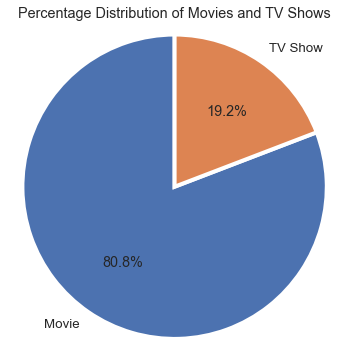

In [145]:
type_counts = df_visualization['type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth':4.0,'edgecolor':'white'})
plt.title('Percentage Distribution of Movies and TV Shows')
plt.axis('equal') 
plt.show()

### Number of Movies/Shows Released in 15-Year Intervals

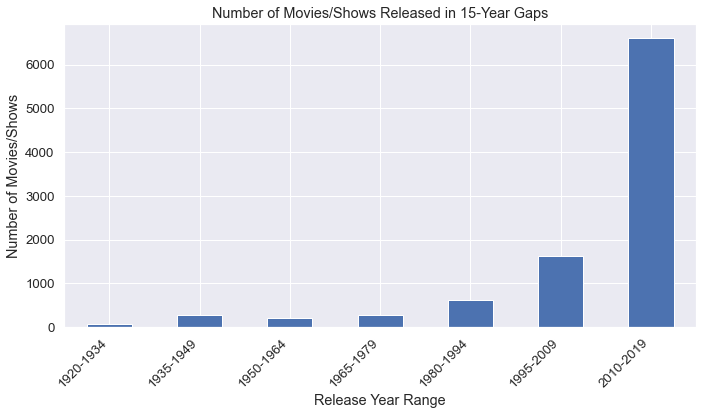

In [146]:
year_gaps = range(min(df_visualization['release_year']), max(df_visualization['release_year']), 15)
labels = []
for year in year_gaps:
    if(year==2010):
        labels.append(f"{year}-2019")
    else:
        labels.append(f"{year}-{year+14}")
grouped_counts = df.groupby(pd.cut(df['release_year'], bins=[*year_gaps, float('inf')], labels=labels)).size()
plt.figure(figsize=(10, 6))
grouped_counts.plot(kind='bar')
plt.xlabel('Release Year Range')
plt.ylabel('Number of Movies/Shows')
plt.title('Number of Movies/Shows Released in 15-Year Gaps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top 10 Longest Duration Movies and Top 10 TV Shows with Highest Seasons

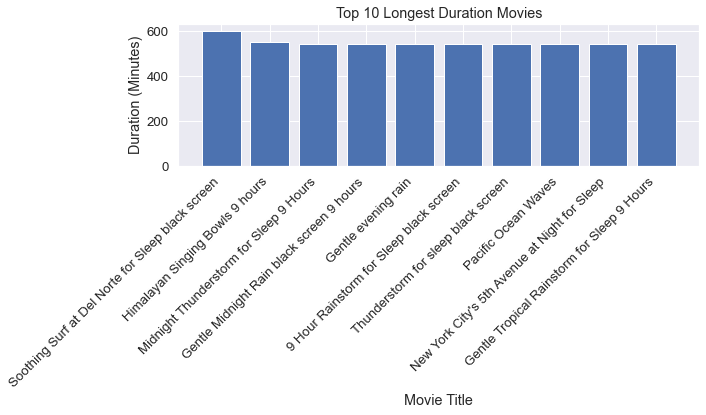

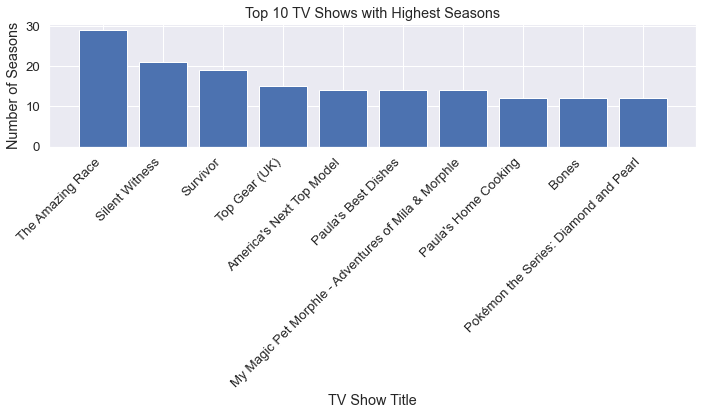

In [147]:
df_visualization['duration_minutes'] = df_visualization['duration'].str.extract(r'(\d+)').astype(float)
df_visualization['num_seasons'] = df_visualization['duration'].str.extract(r'(\d+)').astype(float)
top_10_longest_movies = df_visualization[df_visualization['type'] == 'Movie'].nlargest(10, 'duration_minutes')
top_10_highest_seasons_tv = df_visualization[df_visualization['type'] == 'TV Show'].nlargest(10, 'num_seasons')
plt.figure(figsize=(10, 6))
plt.bar(top_10_longest_movies['title'], top_10_longest_movies['duration_minutes'])
plt.xlabel('Movie Title')
plt.ylabel('Duration (Minutes)')
plt.title('Top 10 Longest Duration Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
plt.bar(top_10_highest_seasons_tv['title'], top_10_highest_seasons_tv['num_seasons'])
plt.xlabel('TV Show Title')
plt.ylabel('Number of Seasons')
plt.title('Top 10 TV Shows with Highest Seasons')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
df_visualization.drop(['duration_minutes'], axis = 1, inplace = True)
df_visualization.drop(['num_seasons'], axis = 1, inplace = True)

### Most Common Words in Descriptions

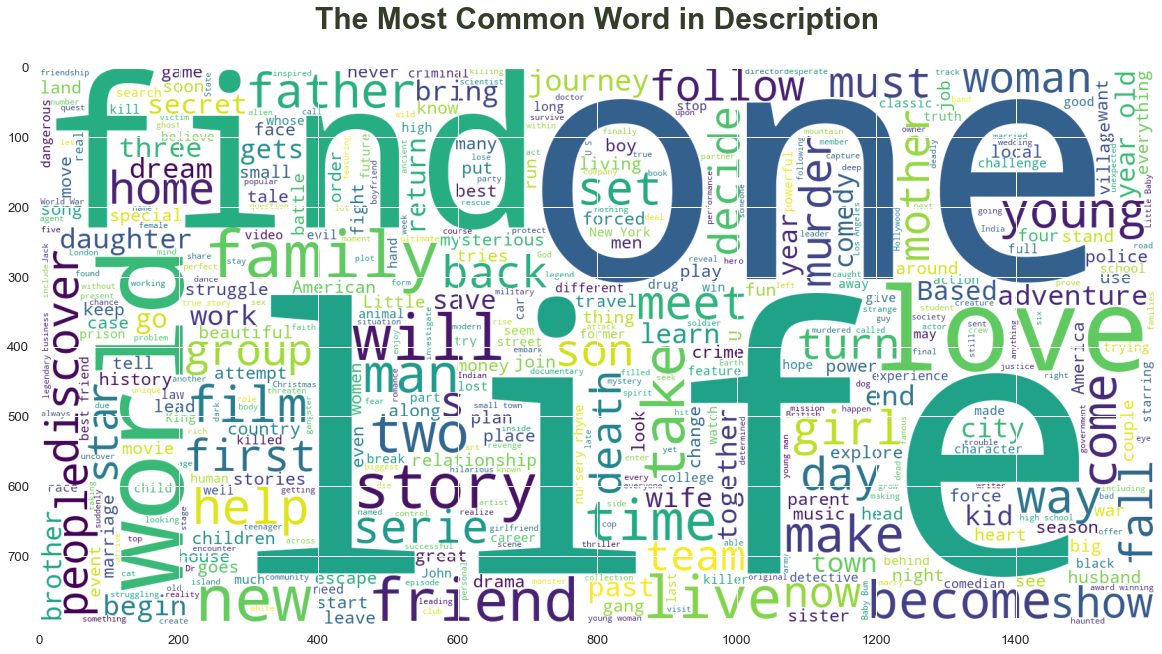

In [148]:
plt.figure(figsize=(20,20))
plt.title('The Most Common Word in Description\n', fontsize=30, weight=600, color='#333d29')
wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(' '.join(df_visualization['description']))
plt.imshow(wc)

###  label encoding for visualization

In [149]:
label_encoder = LabelEncoder()
df_visualization['type'] = label_encoder.fit_transform(df_visualization['type'])
df_visualization['release_year'] = label_encoder.fit_transform(df_visualization['release_year'])

### season duration transformation

In [150]:
#ransformation of TV show durations from 'duration' to 'duration_minutes' and 'duration_seasons' columns, considering average_season_duration as 400 minutes.
average_season_duration = 400
def seasons_to_minutes(row):
    if 'Season' in row['duration']:
        num_seasons = int(row['duration'].split()[0])
        return num_seasons * average_season_duration
    return int(row['duration'].split()[0])
def minutes_to_seasons(row):
    if 'min' in row['duration']:
        num_minutes = int(row['duration'].split()[0])
        return num_minutes // average_season_duration
    return int(row['duration'].split()[0])
df_visualization['duration_minutes'] = df_visualization.apply(seasons_to_minutes, axis=1)
df_visualization['duration_seasons'] = df_visualization.apply(minutes_to_seasons, axis=1)
df_visualization.drop(['duration'], axis = 1, inplace = True)

### Correlation Heatmap of Content Type, Release Year, and Duration

<Axes: >

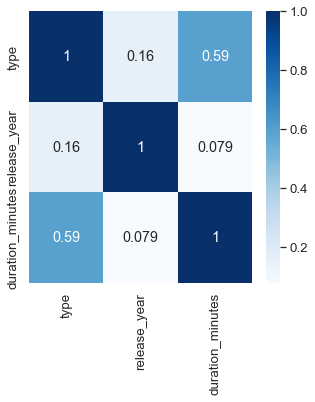

In [151]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.set(font_scale=1.2)
sns.heatmap(data=df_visualization[['type', 'release_year', 'duration_minutes']].corr(), cmap='Blues', annot=True)

### Correlation with Content Type

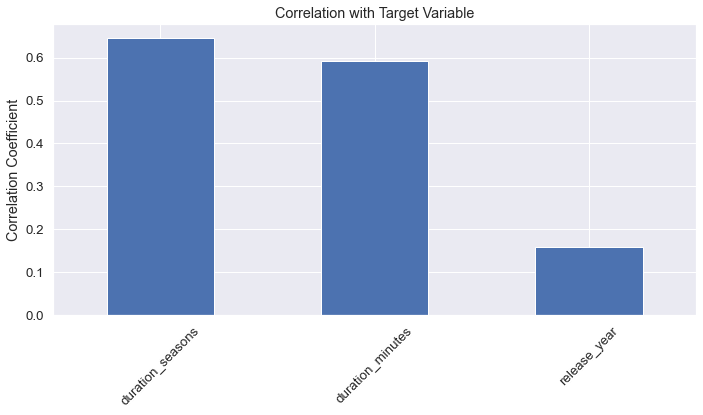

In [152]:
correlation_matrix = df_visualization.corr()
target_correlation = correlation_matrix['type'].drop('type')
target_correlation = target_correlation.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
target_correlation.plot(kind='bar')
plt.title('Correlation with Target Variable')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Preprocessing
### Text Data Preprocessing Functions
These functions, text_preprocessing, remove_stop_words, stemming, and lemmatization, serve various text data preprocessing purposes:
1. text_preprocessing: Tokenizes text, converts it to lowercase, and removes non-alphanumeric characters.
2. remove_stop_words: Removes common English stop words from the text.
3. stemming: Applies Porter stemming to reduce words to their root form.
4. lemmatization: Utilizes WordNet lemmatization to reduce words to their base or dictionary form.

In [154]:
def text_preprocessing(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words]
    words = [word for word in words if word.isalnum()]
    return ' '.join(words)

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

def stemming(text):
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [155]:
df_visualization['merged_text'] = df_visualization['title'] + ' ' + df_visualization['description']
df_visualization['merged_text'] = df_visualization['merged_text'].apply(text_preprocessing)
df_visualization['merged_text'] = df_visualization['merged_text'].apply(remove_stop_words)
df_visualization['merged_text'] = df_visualization['merged_text'].apply(stemming)
df_visualization['merged_text'] = df_visualization['merged_text'].apply(lemmatization)
df_visualization['merged_text'] = df_visualization['merged_text'].str.replace('director', '', case=False)
df_visualization['merged_text'] = df_visualization['merged_text'].str.replace('cast', '', case=False)
df_visualization['merged_text'] = df_visualization['merged_text'].str.replace('type', '', case=False)
df_visualization.drop(columns=['title', 'description'], inplace=True)

### Text Data Vectorization and Integration
a CountVectorizer is used to convert text data from the column in the DataFrame into a numerical matrix title_matrix. The resulting matrix is then transformed into a DataFrame, with columns representing the unique words in the text. Finally, these word frequency features are concatenated with the original DataFrame before removing the previous column to create a consolidated dataset for further analysis.

In [156]:
count_vectorizer = CountVectorizer()
title_matrix = count_vectorizer.fit_transform(df_visualization['merged_text'])
title_df = pd.DataFrame(title_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
df_visualization = pd.concat([df_visualization, title_df], axis=1)
df_visualization.drop(['merged_text'], axis = 1, inplace = True)

###  One-Hot Encoding for Categorical Data
The apply_one_hot_encoding function is applied to the DataFrame for various categorical columns ('director', 'cast', 'rating', 'genre'). The process involves the following steps:
1. Adding an 'ID' column to uniquely identify rows.
2. Splitting the specified column by commas and creating multiple rows for each value using explode.
3. Creating one-hot encoded columns for each unique value in the exploded column.
4. Grouping by 'ID' and selecting the maximum value to consolidate the one-hot encoded data.
5. Dropping the original categorical column and the 'ID' column to obtain the final one-hot encoded representation for the specified column.

In [157]:
def apply_one_hot_encoding(df_visualization,column):
    df_visualization['ID'] = range(1, len(df_visualization) + 1)
    df_visualization[column] = df_visualization[column].apply(lambda x: x.split(','))
    df_long = df_visualization.explode(column)
    df_visualization = pd.concat([df_visualization, pd.get_dummies(df_long[column],prefix=column, prefix_sep='_')], axis=1)
    df_visualization = df_visualization.groupby('ID').max().reset_index()
    df_visualization = df_visualization.drop(column, axis=1)
    df_visualization = df_visualization.drop('ID', axis=1)
    return df_visualization
df_visualization = apply_one_hot_encoding(df_visualization,'director')
df_visualization = apply_one_hot_encoding(df_visualization,'cast')
df_visualization = apply_one_hot_encoding(df_visualization,'rating')
df_visualization = apply_one_hot_encoding(df_visualization,'genre')

## Model Preparing
### Feature-Target Split 

In [158]:
y =  df_visualization['type']
X = df_visualization.drop(['type'], axis=1)
X.columns = X.columns.astype(str)

###  Train-Test Split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Testing
### Support Vector Machine (SVM) Classifier and Accuracy Visualization
A Support Vector Machine (SVM) classifier is trained and evaluated on the provided training and testing datasets (X_train, y_train, X_test, y_test). The classifier's accuracy on both the testing and training sets is calculated and displayed.

SVM  Testing Accuracy: 0.61
SVM Training Accuracy: 0.6725


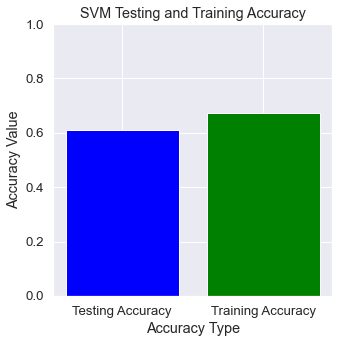

In [161]:
svm_classifier = SVC(C=0.001)
svm_classifier.fit(X_train, y_train)
svm_preds = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_train_preds = svm_classifier.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_preds)
print(f"SVM  Testing Accuracy: {svm_accuracy}")
print(f"SVM Training Accuracy: {svm_train_accuracy}")
categories = ['Testing Accuracy', 'Training Accuracy']
values = [svm_accuracy, svm_train_accuracy]
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Value')
plt.title('SVM Testing and Training Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits appropriately
plt.show()

### Random Forest Classification and Accuracy Visualization
A Random Forest classifier to the training data, calculates both testing and training accuracies, and then displays the results. It also visualizes the accuracies using a bar chart, illustrating the performance of the Random Forest model on the dataset.

RF Testing Accuracy: 0.635
RF Training Accuracy: 0.7375


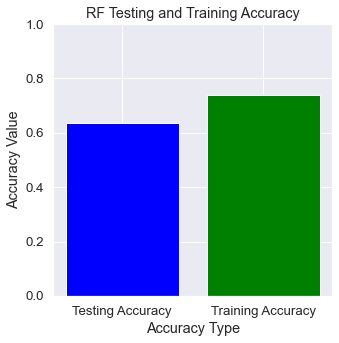

In [162]:
rf_classifier = RandomForestClassifier(max_depth=7)
rf_classifier.fit(X_train, y_train)
rf_preds = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_train_preds = rf_classifier.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_preds)
print(f"RF Testing Accuracy: {rf_accuracy}")
print(f"RF Training Accuracy: {rf_train_accuracy}")
categories = ['Testing Accuracy', 'Training Accuracy']
values = [rf_accuracy, rf_train_accuracy]
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Value')
plt.title('RF Testing and Training Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits appropriately
plt.show()

### Naive Bayes Classification and Accuracy Visualization
A Multinomial Naive Bayes (NB) classifier with a specified alpha value is applied to the training data. It calculates and displays both testing and training accuracies for the NB model. The code also visualizes the accuracies using a bar chart, illustrating the performance of the NB model on the dataset.

NB  Testing Accuracy: 0.81
NB Training Accuracy: 0.81375


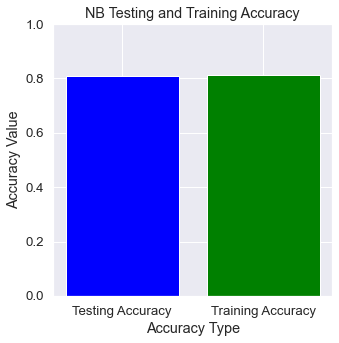

In [164]:
nb_classifier = MultinomialNB(alpha=10)
nb_classifier.fit(X_train, y_train)
nb_preds = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_preds)
nb_train_preds = nb_classifier.predict(X_train)
nb_train_accuracy = accuracy_score(y_train, nb_train_preds)
print(f"NB  Testing Accuracy: {nb_accuracy}")
print(f"NB Training Accuracy: {nb_train_accuracy}")
categories = ['Testing Accuracy', 'Training Accuracy']
values = [nb_accuracy, nb_train_accuracy]
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Value')
plt.title('NB Testing and Training Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits appropriately
plt.show()

### Neural Network Classification and Accuracy Visualization
A Multi-Layer Perceptron (MLP) classifier with specific hidden layer sizes and alpha value is applied to the training data. It calculates and displays both testing and training accuracies for the MLP model. Additionally, the code visualizes the accuracies using a bar chart, illustrating the performance of the Neural Network model on the dataset.

NN  Testing Accuracy: 0.61
NN Training Accuracy: 0.6725


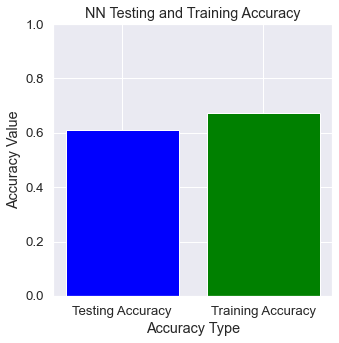

In [165]:
nn_classifier = MLPClassifier(hidden_layer_sizes=(64,32,16),alpha=1000)
nn_classifier.fit(X_train, y_train)
nn_preds = nn_classifier.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_preds)
nn_train_preds = nn_classifier.predict(X_train)
nn_train_accuracy = accuracy_score(y_train, nn_train_preds)
print(f"NN  Testing Accuracy: {nn_accuracy}")
print(f"NN Training Accuracy: {nn_train_accuracy}")
categories = ['Testing Accuracy', 'Training Accuracy']
values = [nn_accuracy, nn_train_accuracy]
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy Value')
plt.title('NN Testing and Training Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits appropriately
plt.show()